### 1. Data Loading and Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools for the actual model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset from "spam.csv"
# Note: Sometimes this file has encoding issues, so I'll use 'latin-1'
df = pd.read_csv('spam.csv', encoding='latin-1')

# Dropping unnecessary columns that usually come with this dataset
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Renaming columns so they make sense
df.columns = ['label', 'message']

print("First few rows of our data:")
df.head()

First few rows of our data:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 2. Exploratory Data Analysis (EDA)

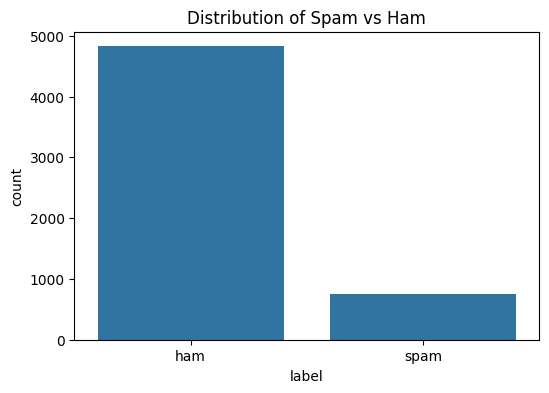

In [4]:
# Let's see how many spam vs ham messages we have
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title('Distribution of Spam vs Ham')
plt.show()




### 3. Model Training

Training shape: (4457, 7472)


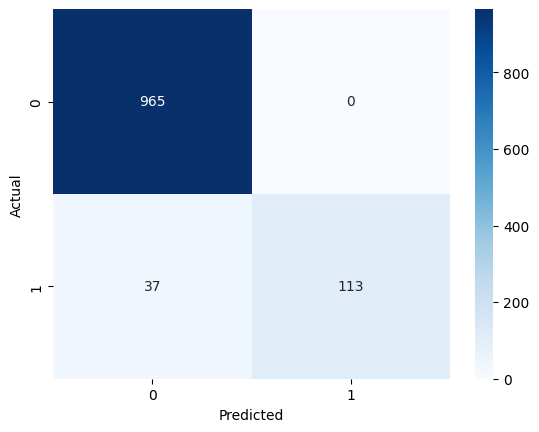

In [5]:
# Converting 'ham' to 0 and 'spam' to 1 for the model
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# We need to split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# Computers don't understand text, so we convert words to numbers using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Training shape: {X_train_vec.shape}")

# Using Naive Bayes because it's known to perform really well on text classification
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Making predictions on the test set
predictions = model.predict(X_test_vec)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4. Results and Testing

In [6]:
# Check how we did
print("--- Accuracy Score ---")
print(accuracy_score(y_test, predictions))

print("\n--- Detailed Report ---")
print(classification_report(y_test, predictions))

def predict_spam(text):
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)
    return "SPAM" if prediction[0] == 1 else "HAM (Safe)"

# Testing with some fake examples
test_1 = "Congratulations! You've won a $1000 Walmart gift card. Click here to claim."
test_2 = "Hey, are we still meeting for coffee at 5 PM today?"

print(f"Test 1: {predict_spam(test_1)}")
print(f"Test 2: {predict_spam(test_2)}")

--- Accuracy Score ---
0.9668161434977578

--- Detailed Report ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Test 1: SPAM
Test 2: HAM (Safe)
